### Imported necessaries libraries

In [517]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Split dataset into training and testing sets

### Generate synthetic dataset with three distinct classes

In [518]:
np.random.seed(0)
X = np.random.randn(500, 2)  # 500 samples, 2 features
Y = np.random.randint(0, 3, (500, 1))  # 3 classes

### Neural Network class for multi-class classification

In [519]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 20
        hiddenLayerNeurons2 = 15
        hiddenLayerNeurons3 = 10
        outLayerNeurons = 3  # 3 output neurons for 3 classes

        self.learning_rate = 0.3
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_HI2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_HI3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_OH = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI1)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_HI2)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_HI3)
        self.hidden_output3 = self.sigmoid(hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_HI3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_HI2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI1 += X.T.dot(hidden_delta1)
        self.W_HI2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_HI3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

### Convert Y to one-hot encoding and Train the neural network model

In [520]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert Y to one-hot encoding
Y_train_one_hot = np.zeros((Y_train.size, 3))
Y_train_one_hot[np.arange(Y_train.size), Y_train.flatten()] = 1

# Train the neural network
NN = NeuralNetwork()
err = []
epochs = 10000
for i in range(epochs):
    NN.train(X_train, Y_train_one_hot)
    loss = np.mean(np.square(Y_train_one_hot - NN.feedForward(X_train)))
    err.append(loss)

    # Print epoch and training loss
    if i % 100 == 0:  # Print every 100 epochs
        print(f"Epoch: {i}/10000, Training Loss: {loss}")

Epoch: 0/10000, Training Loss: 0.40519475339186234
Epoch: 100/10000, Training Loss: 0.2191448759791869
Epoch: 200/10000, Training Loss: 0.21614431888416438
Epoch: 300/10000, Training Loss: 0.21570847454601827
Epoch: 400/10000, Training Loss: 0.2142241905948493
Epoch: 500/10000, Training Loss: 0.2126330742907196
Epoch: 600/10000, Training Loss: 0.2092500446879039
Epoch: 700/10000, Training Loss: 0.20770020256282365
Epoch: 800/10000, Training Loss: 0.20697499024269944
Epoch: 900/10000, Training Loss: 0.20575049480931074
Epoch: 1000/10000, Training Loss: 0.20493018051806572
Epoch: 1100/10000, Training Loss: 0.2038571852104582
Epoch: 1200/10000, Training Loss: 0.2031551178638638
Epoch: 1300/10000, Training Loss: 0.20296512735410965
Epoch: 1400/10000, Training Loss: 0.2018448525786647
Epoch: 1500/10000, Training Loss: 0.20126671143576844
Epoch: 1600/10000, Training Loss: 0.20017826301457972
Epoch: 1700/10000, Training Loss: 0.20050533318471153
Epoch: 1800/10000, Training Loss: 0.19780577341

### Visual representation Epoch vs Training loss

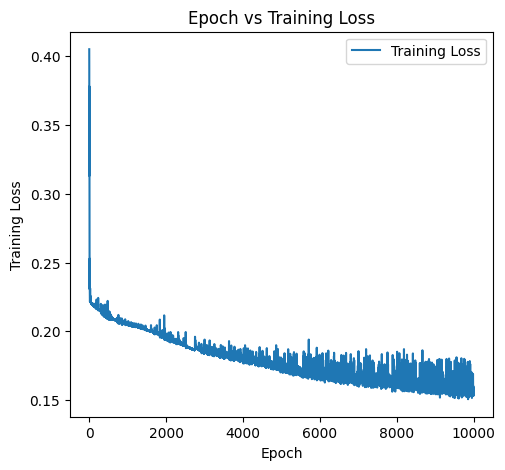

In [521]:
# Plot epoch vs training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), err, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Epoch vs Training Loss")
plt.legend()

### Evaluate Neural Network model with testing data

In [522]:
# Evaluate performance using testing data
predictions = NN.feedForward(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class indices
actual_classes = np.squeeze(Y_test)  # Convert Y_test to a 1D array

### Accuracy Calculate

In [523]:
# Calculate accuracy
accuracy = np.mean(predicted_classes == actual_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 42.00%


### Visual representation

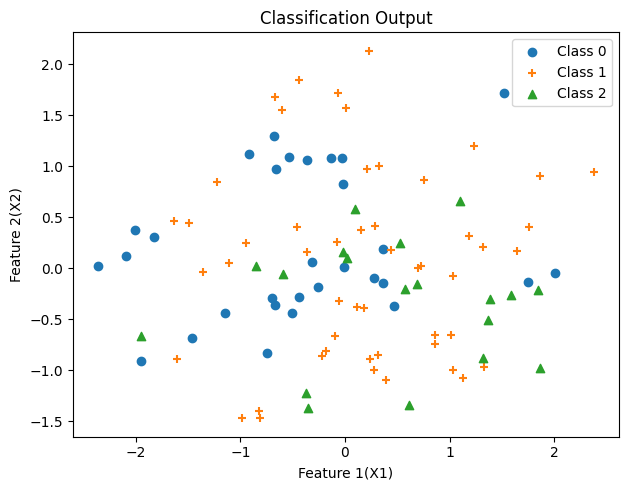

In [524]:
# Scatter plot for classified output
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_test[predicted_classes == 0, 0], X_test[predicted_classes == 0, 1], label=f"Class {0}", marker='o')
plt.scatter(X_test[predicted_classes == 1, 0], X_test[predicted_classes == 1, 1], label=f"Class {1}", marker='+')
plt.scatter(X_test[predicted_classes == 2, 0], X_test[predicted_classes == 2, 1], label=f"Class {2}", marker='^')
plt.xlabel("Feature 1(X1)")
plt.ylabel("Feature 2(X2)")
plt.title("Classification Output")
plt.legend()

plt.tight_layout()
plt.show()